## Task 3

Company X works with a distribution partner to store, pick and pack their goods. They are currently in negotiations to **reduce distribution costs by 10% per unit on orders of quantity 3 or more**. Company X wants to understand the downstream impacts on their **gross margin as a percentage of monthly sales**. Please use the attached dataset titled ‘Company X - Q3’ to help them. Note: in this case gross margin is calculated as (Sales Revenue + Shipping Revenue) - (Cost of Goods Sold + Distribution Costs + Shipping Costs). **Distribution costs are allocated on a per unit basis and are uniform**, regardless of sku sold.

**gross margin is calculated as (Sales Revenue + Shipping Revenue) - (Cost of Goods Sold + Distribution Costs + Shipping Costs)**

**Assumption** It is noted that costs are allocated on a per unit basis only for distribution costs. Therefore I will assume all other stated revenues and costs are total per order.

**Critical Reminder:** 10% cost reduction **PER UNIT** not on total **distribution cost**

- get the cost reduction per unit
- get the new distribution cost
- compare it old distribution cost
- create a column for the difference
- create a column for % change of cost per deal (and demonstrate overal as well)
- create a column for % change of gross marjin per deal (and demonstrate overall as well)
- demonstrate the impact on gross margin as a percentage of sales and get a column for that

**Note:** Before I proceed to the assignment, I want to become familiar with the data.

import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import src.eda as eda

sns.set_palette('Set2')

import warnings
warnings.filterwarnings('ignore')

load the data

In [52]:
df = pd.read_excel("data/Company_X_Q3.xlsx")

In [53]:
df.shape

(2735, 9)

In [54]:
df.columns

Index(['Order Number', 'Order Date', 'Customer ID', 'Quantity Sold',
       'Sales Revenue', 'Cost of Goods Sold', 'Distribution Cost',
       'Shipping Revenue', 'Shipping Cost'],
      dtype='object')

In [55]:
df.head(10)

,Order Number,Order Date,Customer ID,Quantity Sold,Sales Revenue,Cost of Goods Sold,Distribution Cost,Shipping Revenue,Shipping Cost
0,2,2018-10-01,24,4,11.73,4.84,0.4,4,1.00
1,3,2018-10-01,200,3,6.33,2.52,0.3,20,0.75
2,5,2018-10-01,76,5,21.37,8.93,0.5,9,1.25
3,7,2018-10-01,527,9,52.47,21.49,0.9,9,2.25
4,8,2018-10-01,991,1,2.79,1.23,0.1,20,0.25
5,9,2018-10-01,801,3,12.30,5.91,0.3,4,0.75
6,14,2018-10-01,227,5,11.61,4.63,0.5,20,1.25
7,15,2018-10-01,469,8,46.47,17.78,0.8,20,2.00
8,16,2018-10-01,302,1,6.92,3.04,0.1,4,0.25
9,18,2018-10-01,251,2,6.44,2.38,0.2,9,0.50


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 9 columns):
Order Number          2735 non-null int64
Order Date            2735 non-null datetime64[ns]
Customer ID           2735 non-null int64
Quantity Sold         2735 non-null int64
Sales Revenue         2735 non-null float64
Cost of Goods Sold    2735 non-null float64
Distribution Cost     2735 non-null float64
Shipping Revenue      2735 non-null int64
Shipping Cost         2735 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 192.4 KB


Any awkward data points such as negative sales revenue? 

In [57]:
df.describe() 

,Order Number,Customer ID,Quantity Sold,Sales Revenue,Cost of Goods Sold,Distribution Cost,Shipping Revenue,Shipping Cost
count,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,1875.972212,508.243510,5.537112,27.543755,11.403466,0.553711,10.990859,1.384278
std,1066.460054,291.118429,3.580099,19.669939,8.180279,0.358010,6.706698,0.895025
min,2.000000,1.000000,1.000000,2.100000,0.820000,0.100000,4.000000,0.250000
25%,965.500000,255.000000,3.000000,13.000000,5.280000,0.300000,4.000000,0.750000
50%,1875.000000,511.000000,5.000000,23.070000,9.550000,0.500000,9.000000,1.250000
75%,2798.000000,763.000000,7.000000,37.510000,15.505000,0.700000,20.000000,1.750000
max,3720.000000,1000.000000,24.000000,128.040000,51.970000,2.400000,20.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13e68198>,
      dtype=object)

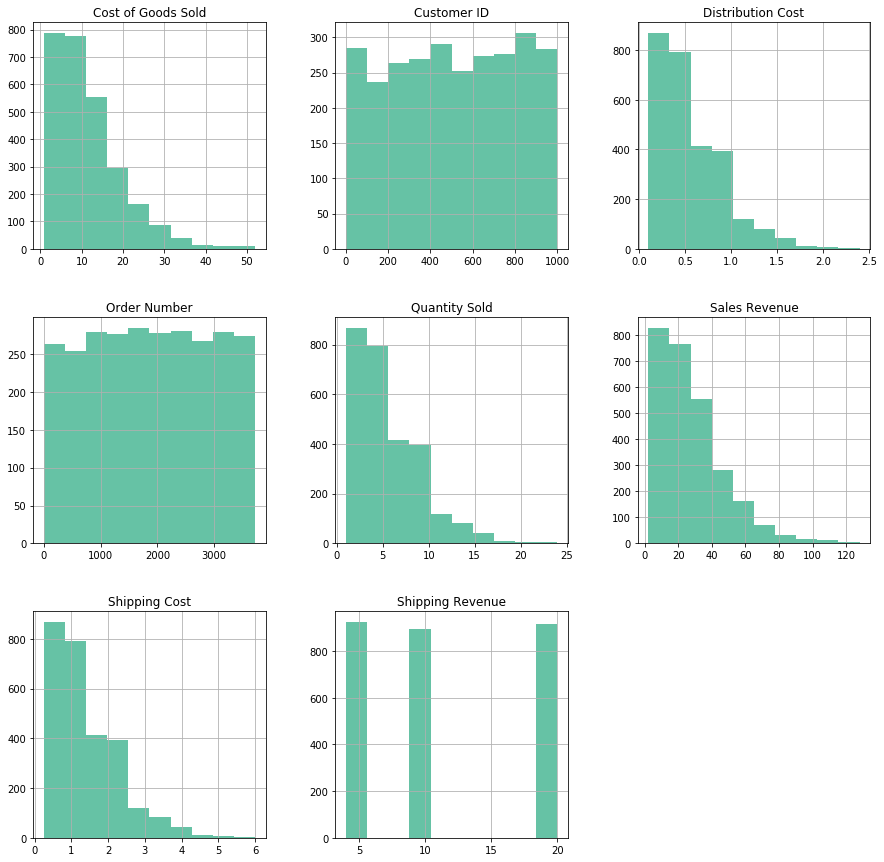

In [58]:
df.hist(figsize = (15,15))

In [59]:
# pd.scatter_matrix(df, alpha=0.2, figsize=(15, 15))
# plt.show()

**Order date**

What year, is this?

In [60]:
df['Order Date'].dt.year.unique()

array([2018])

What month is it?

In [61]:
df['Order Date'].dt.month.unique()

array([10, 11])

Lets create new data_frames to check monthly subsets.

In [63]:
df_oc = df[df['Order Date'].dt.month == 10]
df_nov = df[df['Order Date'].dt.month == 11]  #Let them sit there.

So this analisis is being done on October and November combined.

In [64]:
print(df_oc.shape)
print(df_nov.shape)

(1365, 9)
(1370, 9)


**Customer ID**

In [65]:
df['Customer ID'].value_counts().head()

564    8
483    8
713    8
709    8
429    8
Name: Customer ID, dtype: int64

we have some repeating customer IDs and they are high in numbers. Not really relevant for our cause.

**Distribution Cost**

Lets find the total distribution cost.

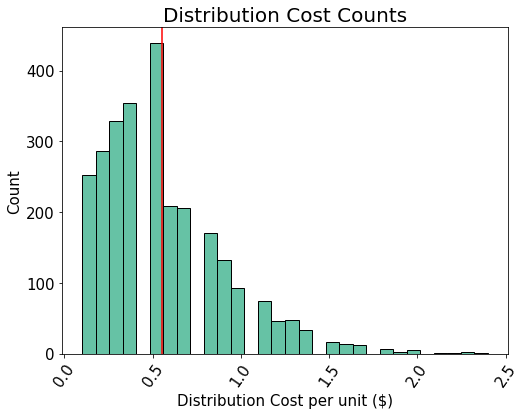

Mean distribution cost per item: $0.55


In [66]:

df['Distribution Cost'].hist(bins = 30,grid=False, edgecolor='black',figsize =(8,6))
mean = df['Distribution Cost'].mean()
plt.axvline(mean, color='r')
plt.title(f'Distribution Cost Counts', fontsize=20)
# sns.barplot(df_visul[categorical],df_visul[numerical_sum])
plt.ylabel('Count', fontsize=15)
plt.xlabel('Distribution Cost per unit ($)', fontsize=15)
plt.xticks(rotation=55, fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()
print(f'Mean distribution cost per item: ${round(mean,2)}')

**Total Distribution Cost Per Order** : distribution_cost_total = dist_cost * quantity_sold

In [67]:
df['distribution_cost_SQ'] = df['Distribution Cost'] * df['Quantity Sold']

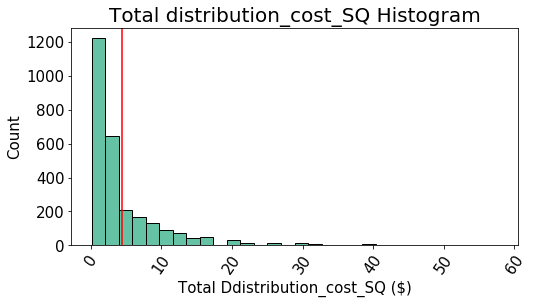

Mean distribution_cost_SQ cost per order is: $4.35


In [68]:
df['distribution_cost_SQ'].hist(bins = 30,grid=False, edgecolor='black',figsize =(8,4))
mean = df['distribution_cost_SQ'].mean()
plt.axvline(mean, color='r')
plt.title(f'Total distribution_cost_SQ Histogram', fontsize=20)
# sns.barplot(df_visul[categorical],df_visul[numerical_sum])
plt.ylabel('Count', fontsize=15)
plt.xlabel('Total Ddistribution_cost_SQ ($)', fontsize=15)
plt.xticks(rotation=55, fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()
print(f'Mean distribution_cost_SQ cost per order is: ${round(mean,2)}')

**Quantity Sold**

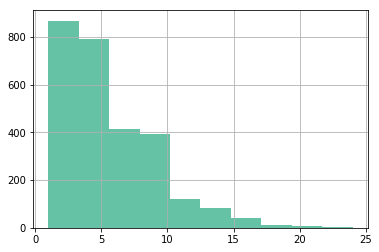

In [69]:
df['Quantity Sold'].hist()

In [70]:
df['Quantity Sold'].describe()

count    2735.000000
mean        5.537112
std         3.580099
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        24.000000
Name: Quantity Sold, dtype: float64

**Quantity of 3 or More**

Number of orders that involved quantities of 3 or more 

In [71]:
(df['Quantity Sold'] >= 3).sum() 

2196

Their Ratio

In [72]:
print(f'ratio of quantities of 3 or more: {round(((df["Quantity Sold"] >= 3).sum()  / df.shape[0]) * 100,1)}%')

ratio of quantities of 3 or more: 80.3%


The distribution cost cutting deal would be effective for 80% of the given datapoints.

**new_feature: 3_or_more**: if quantity of items solds is atleast 3, return binary classifier 1.

In [73]:
def or_more_condition(x):
    if x >= 3:
        return 1
    else:
        return 0

In [74]:
df['condition'] = df['Quantity Sold'].map(or_more_condition) 

New Feature: distribution_cost_per_unit 
    
- return 0.9 of Distribution Cost(per unit) on rows the condition is True and Nan if its not
- fill nan values with their original unchanged ones where condition is False

In [75]:
df.loc[df.condition == 1, 'distribution_cost_per_unit'] = df['Distribution Cost'] * 0.9
df.distribution_cost_per_unit = df.distribution_cost_per_unit.fillna(df['Distribution Cost'])

In [76]:
df[['Quantity Sold','Distribution Cost','distribution_cost_SQ','condition','distribution_cost_per_unit']].head(10)

,Quantity Sold,Distribution Cost,distribution_cost_SQ,condition,distribution_cost_per_unit
0,4,0.4,1.6,1,0.36
1,3,0.3,0.9,1,0.27
2,5,0.5,2.5,1,0.45
3,9,0.9,8.1,1,0.81
4,1,0.1,0.1,0,0.10
5,3,0.3,0.9,1,0.27
6,5,0.5,2.5,1,0.45
7,8,0.8,6.4,1,0.72
8,1,0.1,0.1,0,0.10
9,2,0.2,0.4,0,0.20


**New Feature: dist_cost_change_per_item_sold**

returns the difference between old and new distribution costs per item sold:

In [77]:
df['dist_cost_change_per_item_sold'] = df['Distribution Cost'] - df['distribution_cost_per_unit']

In [78]:
df[['Quantity Sold','Distribution Cost','distribution_cost_SQ','condition','distribution_cost_per_unit','dist_cost_change_per_item_sold']].head(10)

,Quantity Sold,Distribution Cost,distribution_cost_SQ,condition,distribution_cost_per_unit,dist_cost_change_per_item_sold
0,4,0.4,1.6,1,0.36,0.04
1,3,0.3,0.9,1,0.27,0.03
2,5,0.5,2.5,1,0.45,0.05
3,9,0.9,8.1,1,0.81,0.09
4,1,0.1,0.1,0,0.10,0.00
5,3,0.3,0.9,1,0.27,0.03
6,5,0.5,2.5,1,0.45,0.05
7,8,0.8,6.4,1,0.72,0.08
8,1,0.1,0.1,0,0.10,0.00
9,2,0.2,0.4,0,0.20,0.00


**New Feature: dist_cost_sum_new**

returns the sum of new distribution cost

In [79]:
df['dist_cost_sum_new'] = df['distribution_cost_per_unit'] * df['Quantity Sold']

In [80]:
df[['Quantity Sold','Distribution Cost','distribution_cost_SQ','condition',
    'distribution_cost_per_unit','dist_cost_change_per_item_sold','dist_cost_sum_new']].head(10)

,Quantity Sold,Distribution Cost,distribution_cost_SQ,condition,distribution_cost_per_unit,dist_cost_change_per_item_sold,dist_cost_sum_new
0,4,0.4,1.6,1,0.36,0.04,1.44
1,3,0.3,0.9,1,0.27,0.03,0.81
2,5,0.5,2.5,1,0.45,0.05,2.25
3,9,0.9,8.1,1,0.81,0.09,7.29
4,1,0.1,0.1,0,0.10,0.00,0.10
5,3,0.3,0.9,1,0.27,0.03,0.81
6,5,0.5,2.5,1,0.45,0.05,2.25
7,8,0.8,6.4,1,0.72,0.08,5.76
8,1,0.1,0.1,0,0.10,0.00,0.10
9,2,0.2,0.4,0,0.20,0.00,0.40


**New Feature: dist_cost_sum_change**

returns the change(decrease) in the sum of distribution costs.

In [81]:
df['dist_cost_sum_change'] = df['distribution_cost_SQ'] - df['dist_cost_sum_new']

In [82]:
df[['Quantity Sold','Distribution Cost','distribution_cost_SQ','condition',
    'distribution_cost_per_unit','dist_cost_change_per_item_sold','dist_cost_sum_new','dist_cost_sum_change']].head(10)

,Quantity Sold,Distribution Cost,distribution_cost_SQ,condition,distribution_cost_per_unit,dist_cost_change_per_item_sold,dist_cost_sum_new,dist_cost_sum_change
0,4,0.4,1.6,1,0.36,0.04,1.44,0.16
1,3,0.3,0.9,1,0.27,0.03,0.81,0.09
2,5,0.5,2.5,1,0.45,0.05,2.25,0.25
3,9,0.9,8.1,1,0.81,0.09,7.29,0.81
4,1,0.1,0.1,0,0.10,0.00,0.10,0.00
5,3,0.3,0.9,1,0.27,0.03,0.81,0.09
6,5,0.5,2.5,1,0.45,0.05,2.25,0.25
7,8,0.8,6.4,1,0.72,0.08,5.76,0.64
8,1,0.1,0.1,0,0.10,0.00,0.10,0.00
9,2,0.2,0.4,0,0.20,0.00,0.40,0.00


In [83]:
print(f"Total distribution cost before the deal: {round(df.distribution_cost_SQ.sum())}")
print(f"Total distribution cost after the deal: {round(df.dist_cost_sum_new.sum())}")
print(f'difference(decrease) : ${round(df.distribution_cost_SQ.sum() - df.dist_cost_sum_new.sum())}')
print(f"Decrease as a percentage of old distribution cost {round((df.distribution_cost_SQ.sum() - df.dist_cost_sum_new.sum()) / df.distribution_cost_SQ.sum(),3)*100}%")

Total distribution cost before the deal: 11890
Total distribution cost after the deal: 10715
difference(decrease) : $1175
Decrease as a percentage of old distribution cost 9.9%


In [84]:
(df.distribution_cost_SQ.sum() - df.dist_cost_sum_new.sum()) / df.distribution_cost_SQ.sum()

0.09882502354999348

**Total Cost Status Quo**

In [85]:
df.head()

,Order Number,Order Date,Customer ID,Quantity Sold,Sales Revenue,Cost of Goods Sold,Distribution Cost,Shipping Revenue,Shipping Cost,distribution_cost_SQ,condition,distribution_cost_per_unit,dist_cost_change_per_item_sold,dist_cost_sum_new,dist_cost_sum_change
0,2,2018-10-01,24,4,11.73,4.84,0.4,4,1.00,1.6,1,0.36,0.04,1.44,0.16
1,3,2018-10-01,200,3,6.33,2.52,0.3,20,0.75,0.9,1,0.27,0.03,0.81,0.09
2,5,2018-10-01,76,5,21.37,8.93,0.5,9,1.25,2.5,1,0.45,0.05,2.25,0.25
3,7,2018-10-01,527,9,52.47,21.49,0.9,9,2.25,8.1,1,0.81,0.09,7.29,0.81
4,8,2018-10-01,991,1,2.79,1.23,0.1,20,0.25,0.1,0,0.10,0.00,0.10,0.00


In [86]:
df['total_cost_SQ']  = df['Cost of Goods Sold'] + df['distribution_cost_SQ'] + df['Shipping Cost']
df['total_cost_new'] = df['Cost of Goods Sold'] + df['dist_cost_sum_new'] + df['Shipping Cost']
df['total_cost_change_decrease']            = df['total_cost_SQ'] - df['total_cost_new']
df['total_cost_change_decrease_percentage'] = round((df['total_cost_change_decrease'] / df['total_cost_SQ'])*100,1)

In [87]:
df[['total_cost_SQ','total_cost_new','total_cost_change_decrease','total_cost_change_decrease_percentage']].head()

,total_cost_SQ,total_cost_new,total_cost_change_decrease,total_cost_change_decrease_percentage
0,7.44,7.28,0.16,2.2
1,4.17,4.08,0.09,2.2
2,12.68,12.43,0.25,2.0
3,31.84,31.03,0.81,2.5
4,1.58,1.58,0.00,0.0


**change of cost as a percentage of total cost**

In [88]:
print(f'total cost before the deal : ${round(df.total_cost_SQ.sum())}')
print(f'total cost after the deal : ${round(df.total_cost_new.sum())}')
print(f'difference(decrease) : ${round(df.total_cost_SQ.sum() - df.total_cost_new.sum())}') 
# should be same with the difference in the distribution cost
print(f"Decrease as a percentage of old total cost {round((df.total_cost_SQ.sum() - df.total_cost_new.sum()) / df.total_cost_SQ.sum(),3)*100}%")

total cost before the deal : $46864
total cost after the deal : $45689
difference(decrease) : $1175
Decrease as a percentage of old total cost 2.5%


**Revenue** : revenue

In [89]:
df['revenue'] = df['Sales Revenue'] + df['Shipping Revenue']

In [90]:
print(f'total revenue: ${round(df["revenue"].sum())}')

total revenue: $105392


**Old Gross Marjin :** GM_SQ

In [91]:
df['GM_SQ'] = df['revenue'] - df['total_cost_SQ']

In [92]:
print(f'Gross Marjin SQ : {round(df.GM_SQ.sum())}')

Gross Marjin SQ : 58528


**New Gross Marjin:** GM_new

In [93]:
df['GM_new'] = df['revenue'] - df['total_cost_new']

In [94]:
print(f'Gross Marjin New : {round(df.GM_new.sum())}')

Gross Marjin New : 59703


**Gross Marjin Change(increase)**

In [95]:
GM_change_increase = round(df['GM_new'].sum() - df['GM_SQ'].sum())
# shall be same with decrease in total cost and decrease in total distribution cost

In [96]:
GM_change_increase

1175

In [97]:
print(f'Percentage increase of Gross Marjin: {round((GM_change_increase/ df["GM_SQ"].sum())*100,1)}%')

Percentage increase of Gross Marjin: 2.0%


**Gross Marjin Impact as a percentage of Total Revenue**

In [98]:
print(f'SQ Gross Marjin as a percentage of total revenue: {round((df.GM_SQ.sum()/ df["revenue"].sum())*100,1)}%')
print(f'New Gross Marjin as a percentage of total revenue: {round((df.GM_new.sum()/ df["revenue"].sum())*100,1)}%')
print(f'Gross Marjin Positive Impact as a Percentage of Total Revenue: {round((GM_change_increase/ df["revenue"].sum())*100,1)}%')

SQ Gross Marjin as a percentage of total revenue: 55.5%
New Gross Marjin as a percentage of total revenue: 56.6%
Gross Marjin Positive Impact as a Percentage of Total Revenue: 1.1%


**Gross Marjin Impact as a percentage of Sales Revenue**

I considered the shipment revenue as service revenue. Therefore as I am calculating the impact on gross marjin as a % of monthly sales revenue, I considered only sales revenue.


In [99]:
print(f'SQ Gross Marjin as a percentage of sales revenue: {round((df.GM_SQ.sum()/ df["Sales Revenue"].sum())*100,1)}%')
print(f'New Gross Marjin as a percentage of sales revenue: {round((df.GM_new.sum()/ df["Sales Revenue"].sum())*100,1)}%')
print(f'Gross Marjin Positive Impact as a Percentage of Sales Revenue: {round((GM_change_increase/ df["Sales Revenue"].sum())*100,1)}%')

SQ Gross Marjin as a percentage of sales revenue: 77.7%
New Gross Marjin as a percentage of sales revenue: 79.3%
Gross Marjin Positive Impact as a Percentage of Sales Revenue: 1.6%


In [100]:
round((GM_change_increase/ df["Sales Revenue"].sum())*100,1)

1.6

### Conclusion:

The impact of the deal on the gross margin is positive. To be more clear, in case the deal is successfully completed the monthly gross margin increases by $587.5 with respect to provided data.

The positive impact on the gross margin as a percentage of sales revenue is 1.6%

Consequently, depending on the deal cost vs ROI the deal is expected to add financial value to the organization. 



To do next:
 
Add some more comments and visuals.
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd0e908>,
      dtype=object)

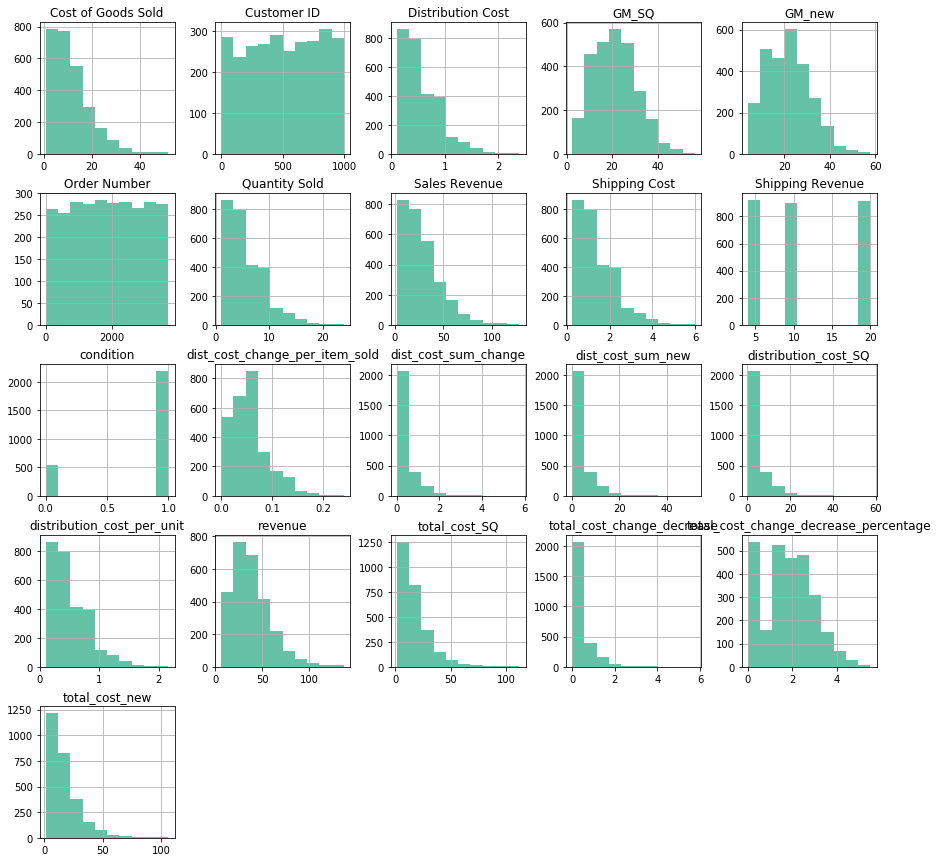

In [50]:
df.hist(figsize = (15,15))